This is the linear regression colab using the Boston House dataset. It was adapted from the link that you gave us:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Coefficients: 
 [-0.33692967  7.8799916 ]
Mean squared error: 13.52
Coefficient of determination: 0.42


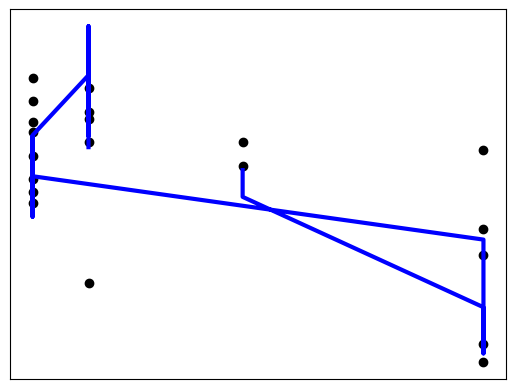

A linear equation with 3 variables is really a plane, but I couldn't figure out how to graph it that way.


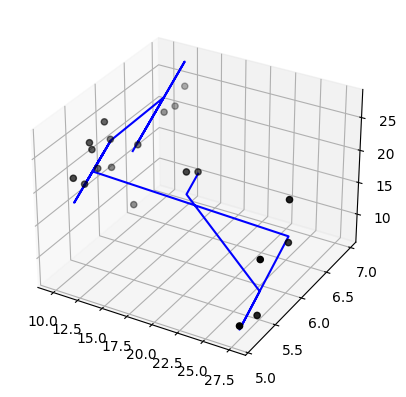

In [1]:
# This code was adapted from the link you gave us
# But I changed it to use a different dataset, more than one column, and having a 3D graph

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# load the boston dataset
# The next four lines are code I got from sklearn when they complained about the dataset being racist
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# using features INDUS and RM for the linear regression
# There is probably a better way of isolating only two non-adjacent columns, but this is what I thought of
new_data = np.array([[row[2], row[5]] for row in data])

# splitting the data and targets into testing/training sets
# I put 20 items in the training sets, because that's what the sample code did
data_train = new_data[:-20]
data_test = new_data[-20:]

target_train = target[:-20]
target_test = target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_train, target_train)

# Make predictions using the testing set
predicted_target = regr.predict(data_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, predicted_target))
# The coefficient of determination: 1 is perfect prediction
# I don't actually know what this means, I'm just keeping it from their code
print("Coefficient of determination: %.2f" % r2_score(target_test, predicted_target))

# Plot outputs - Only plotting using x=INDUS, because otherwise it would be a 3D graph
plt.scatter(data_test[:, np.newaxis, 0], target_test, color="black")
plt.plot(data_test[:, np.newaxis, 0], predicted_target, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Plotting in 3D - I couldn't figure out how to make it show a plane, but I think that's what it's supposed to be
print("A linear equation with 3 variables is really a plane, but I couldn't figure out how to graph it that way.")

ax = plt.axes(projection='3d')
indus = [row[0] for row in data_test]
rm = [row[1] for row in data_test]
ax.plot3D(indus, rm, predicted_target, color="blue")
ax.scatter3D(indus, rm, target_test, color="black")
